In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing Data
URL = 'https://raw.githubusercontent.com/MohamadNach/Machine-Learning-to-Predict-Energy-Consumption/master/events.csv'
df = pd.read_csv(URL)

In [5]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [6]:
print("Return last 5 rows.","\n")
df.tail()

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [8]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



In [9]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [10]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)


In [11]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [12]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [13]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


C:\Users\acer\AppData\Local\Temp\ipykernel_14464\3474282506.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


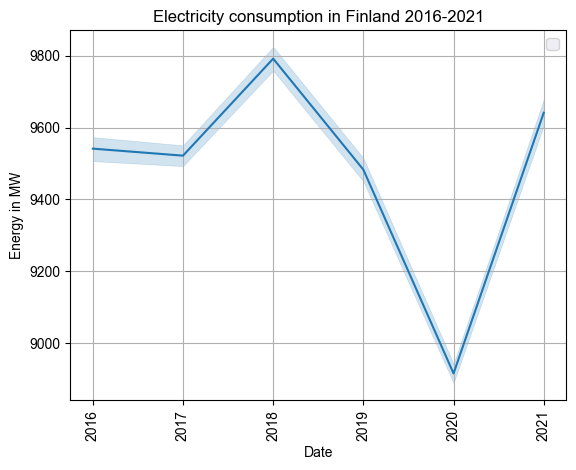

In [14]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

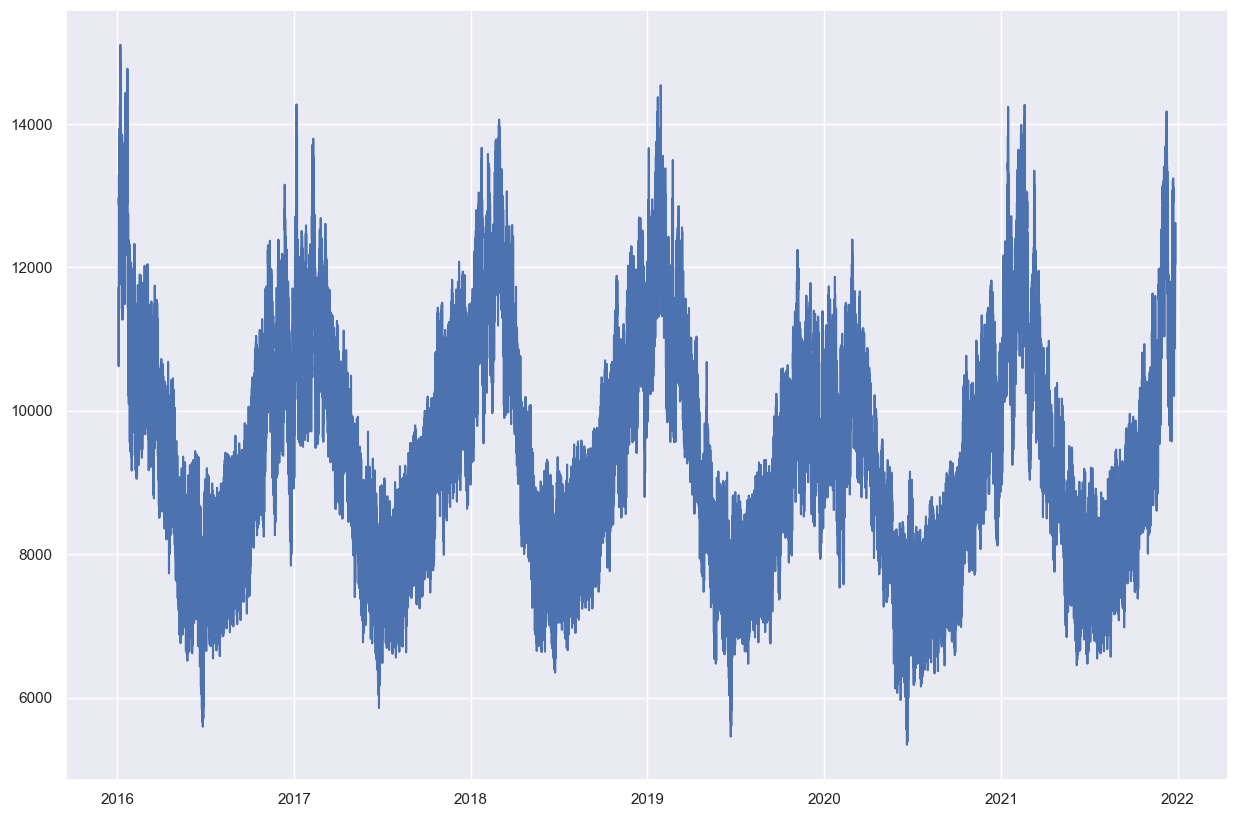

In [15]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

C:\Users\acer\AppData\Local\Temp\ipykernel_14464\4036648314.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


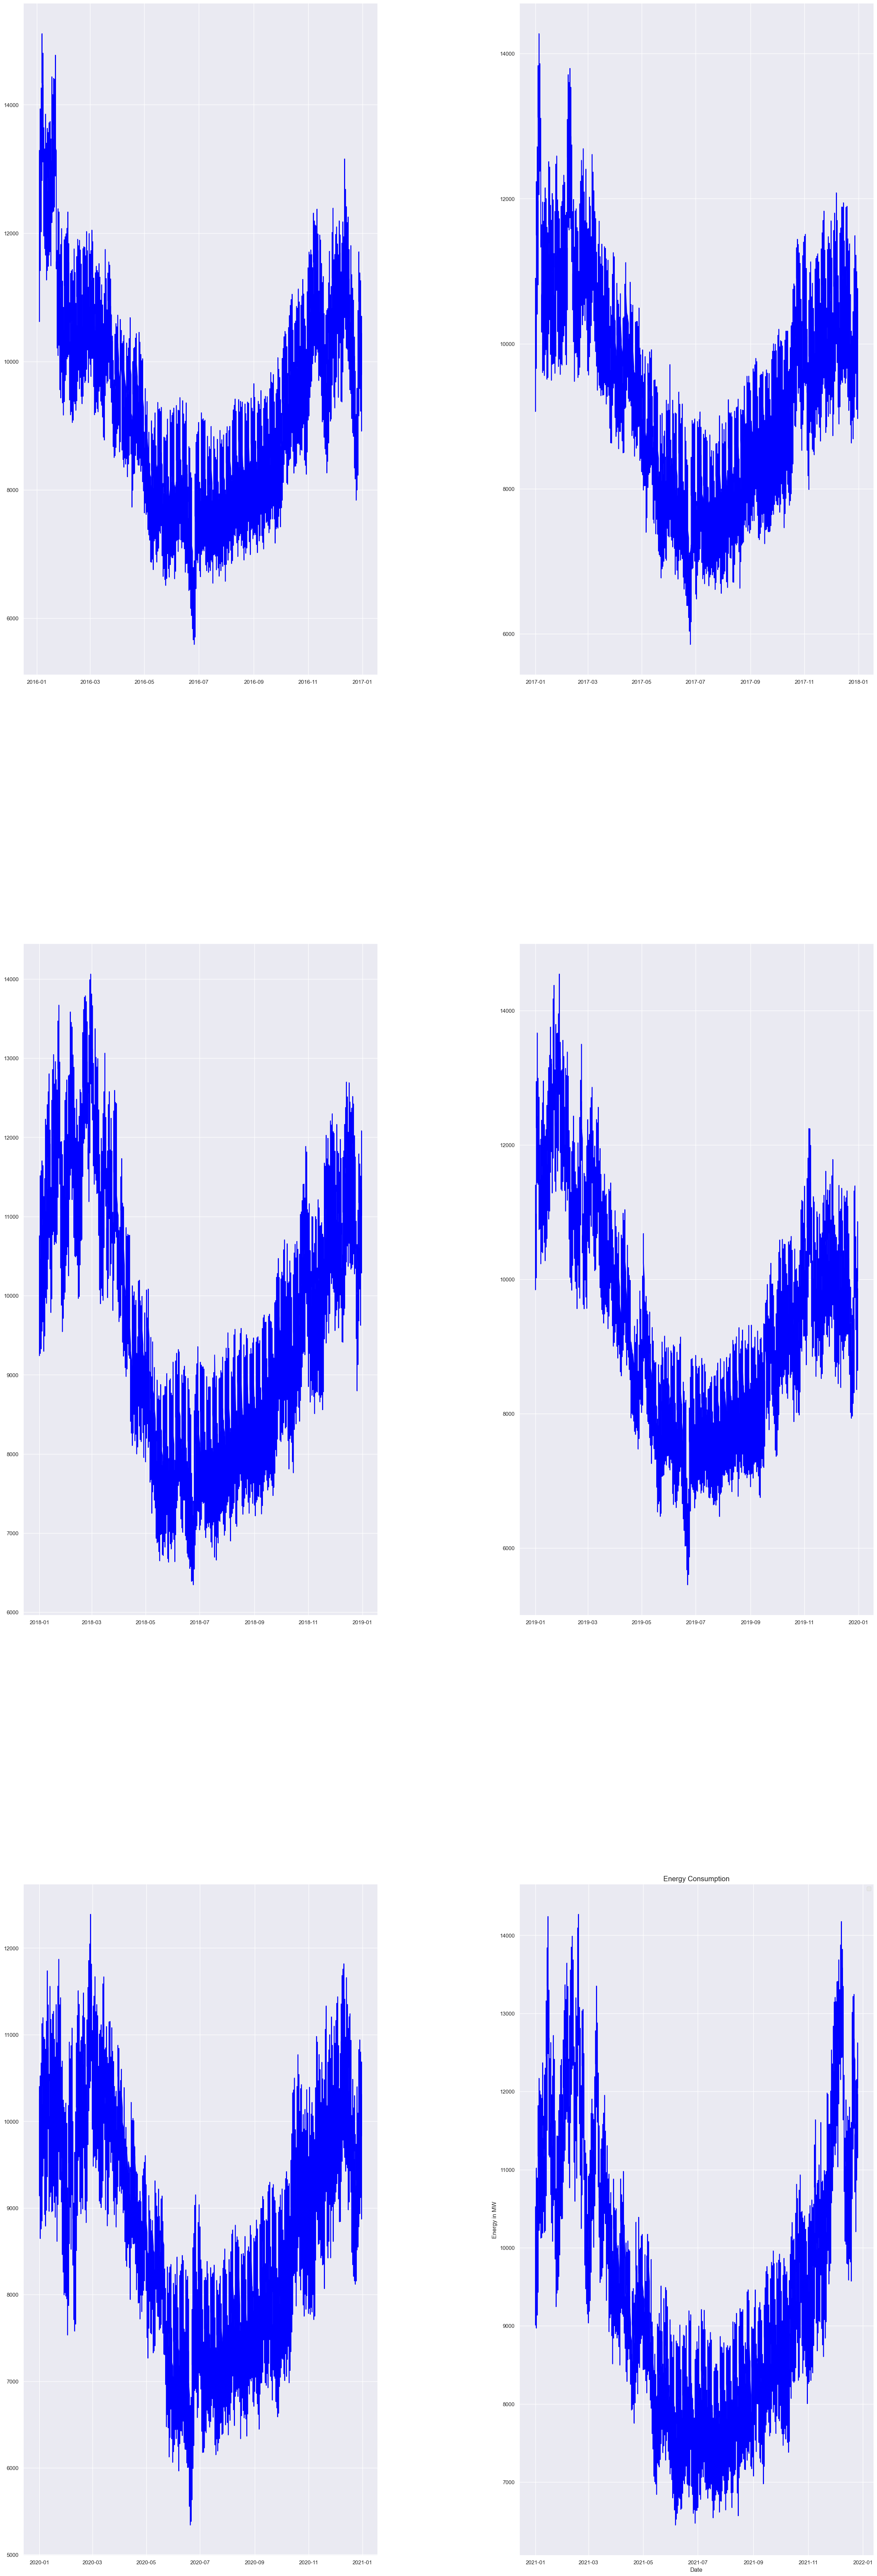

In [16]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

C:\Users\acer\AppData\Local\Temp\ipykernel_14464\1952416682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

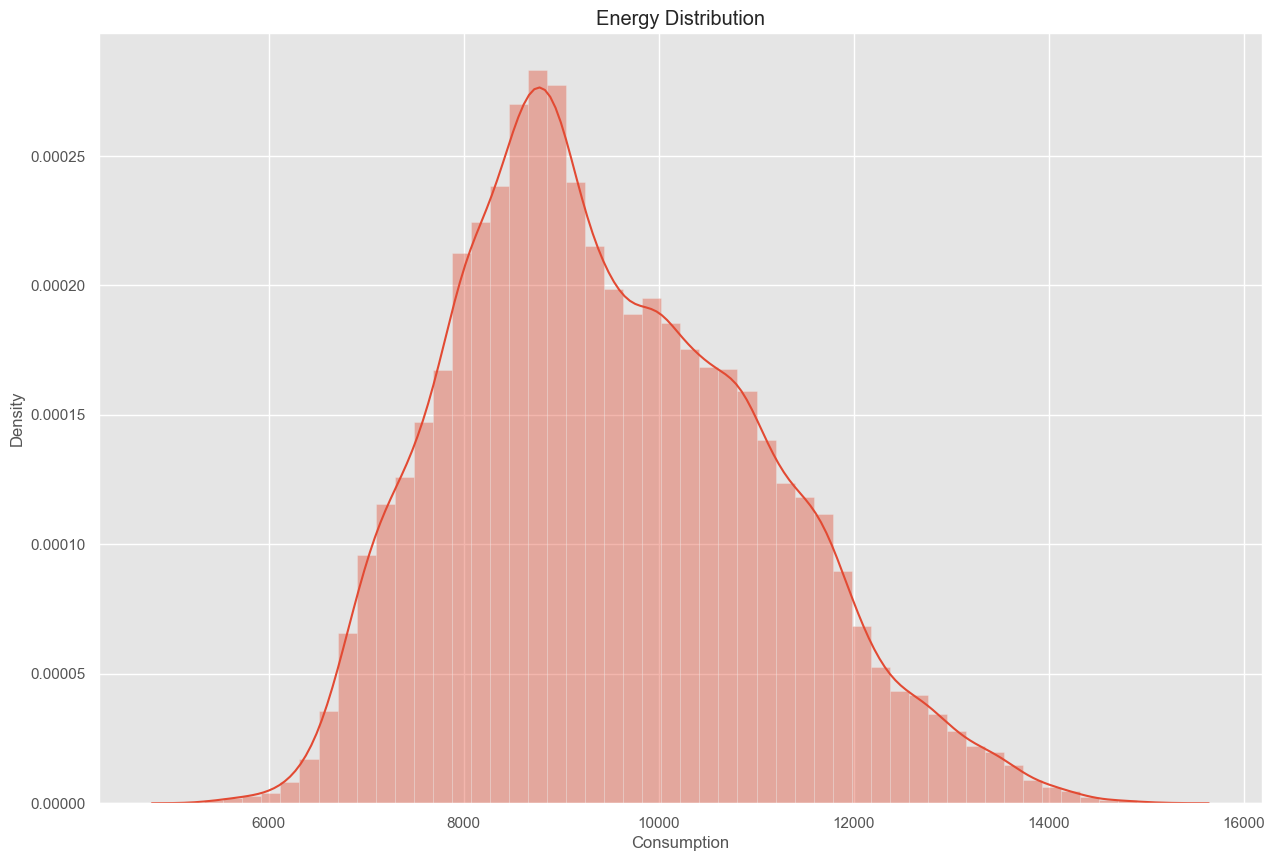

In [17]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

C:\Users\acer\AppData\Local\Temp\ipykernel_14464\4156237786.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


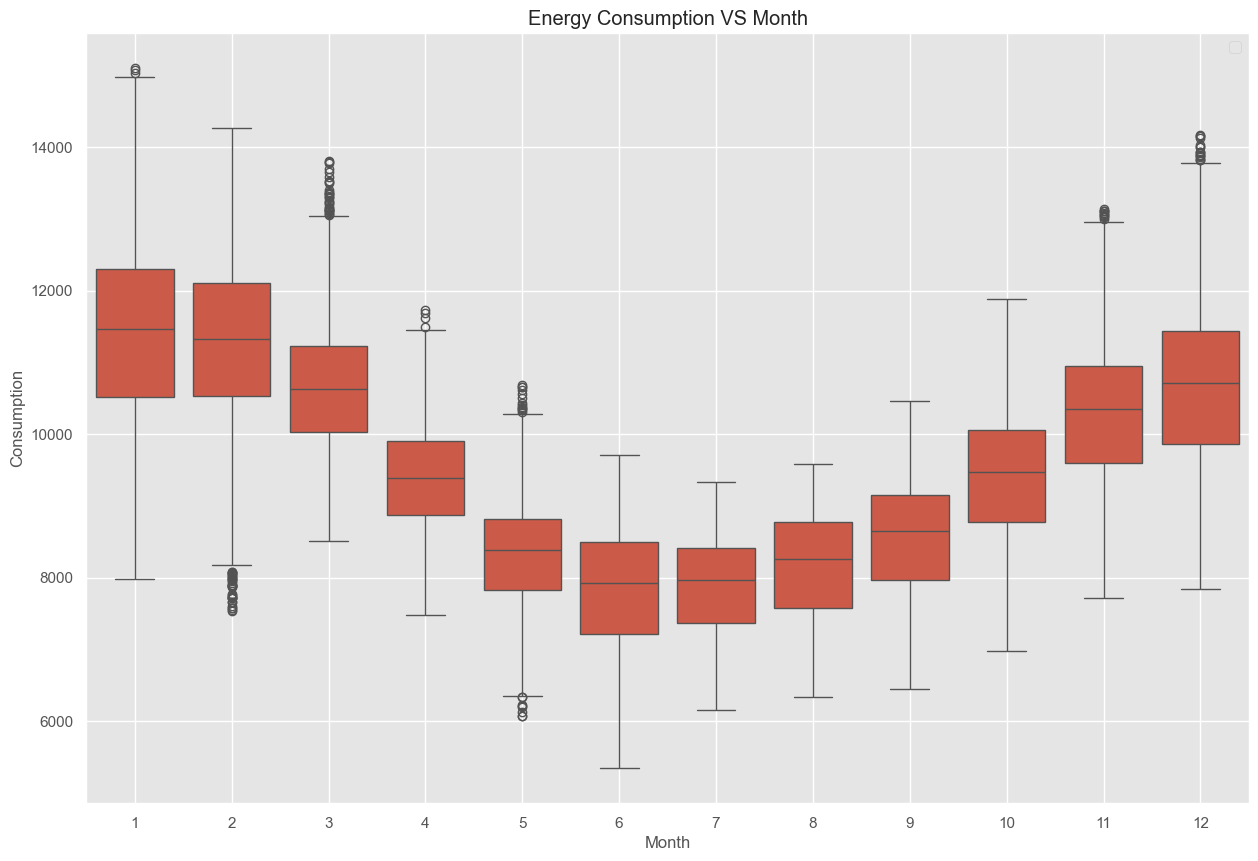

In [18]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [19]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days
# Resample the 'Consumption' column to daily frequency and calculate the mean for each day
resampled_consumption = dataset['Consumption'].resample("D").mean()

# For other columns, decide on an appropriate aggregation method
# Example: taking the first value of each day for 'Month', 'Year', 'Day'
resampled_others = dataset[['Month', 'Year', 'Week']].resample("D").first()

# Combine the resampled 'Consumption' with the other columns
newDataSet = pd.concat([resampled_consumption, resampled_others], axis=1)


In [20]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.
# 2184 / 7 = 312 week
# 312 * 80 %  250 week for train (1750 day)
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [21]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1,2016,1
2016-01-05,12945.375000,1,2016,1
2016-01-06,13192.750000,1,2016,1
2016-01-07,14243.541667,1,2016,1
2016-01-08,14121.666667,1,2016,1


In [22]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


C:\Users\acer\AppData\Local\Temp\ipykernel_14464\3252378364.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [23]:
print(y)

DateTime
2016-01-04    12300.625000
2016-01-05    12945.375000
2016-01-06    13192.750000
2016-01-07    14243.541667
2016-01-08    14121.666667
                  ...     
2021-12-22    12635.958333
2021-12-23    11684.333333
2021-12-24    11384.166667
2021-12-25    11581.625000
2021-12-26    11912.000000
Freq: D, Name: Consumption, Length: 2184, dtype: float64


In [24]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [25]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]

In [26]:
# import pandas as pd
# import numpy as np

# # Read the CSV file
# df = pd.read_csv('02_Lib_Farabi_Sports.csv')

# # Extract the desired column (replace 'column_name' with the actual column name)
# column_data = df['orginal_value'].values

# # Resize the column to the desired shape (437, 1)
# desired_shape = (437, 1)
# if len(column_data) >= desired_shape[0]:
#     resized_column = column_data[:desired_shape[0]].reshape(desired_shape)
# else:
#     # If the column is shorter than the desired shape, pad with NaNs or any other value
#     resized_column = np.pad(column_data, (0, desired_shape[0] - len(column_data)), 'constant', constant_values=np.nan).reshape(desired_shape)

# scaler = MinMaxScaler(feature_range = (0,1))
# test_data = scaler.fit_transform(np.array(resized_column).reshape(-1,1))
# print(test_data)



In [27]:
print("test shape: ",test_data.shape)

test shape:  (437, 1)


In [28]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [30]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100)
X_test shape:  (336, 100)
X_val shape:  (248, 100)


In [31]:
print("y_train shape: ", y_train.shape)
print("ytest shape: ",ytest.shape)
print("yval shape: ",yval.shape)

y_train shape:  (1297,)
ytest shape:  (336,)
yval shape:  (248,)


In [32]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)
print(f" ytest[0] : {ytest[0]}")
print(X_test[0],"\n\n")
# Flatten the 2D array to 1D
array_1d = X_test[0].flatten()

# Convert to a regular Python list
list_1d = array_1d.tolist()

# Print the 1D list
# Add 'f' to the end of each element by converting them to strings
modified_list = [f"{num}f" for num in list_1d]

# Print the modified list
print(modified_list)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)
 ytest[0] : 0.47802912922218777
[[0.40285095]
 [0.33421134]
 [0.30857349]
 [0.4193575 ]
 [0.45455531]
 [0.45102262]
 [0.40211239]
 [0.40051131]
 [0.37954757]
 [0.34445305]
 [0.38204214]
 [0.36811796]
 [0.38441277]
 [0.37072616]
 [0.3944014 ]
 [0.36402231]
 [0.30475674]
 [0.3934356 ]
 [0.3575612 ]
 [0.36831422]
 [0.38952071]
 [0.38295114]
 [0.30687429]
 [0.31719864]
 [0.42644871]
 [0.49505733]
 [0.48879764]
 [0.45131701]
 [0.46779775]
 [0.41787005]
 [0.38373618]
 [0.46276211]
 [0.44596116]
 [0.42849912]
 [0.42244086]
 [0.51698172]
 [0.50022725]
 [0.39616259]
 [0.44584237]
 [0.47328272]
 [0.50456564]
 [0.45412148]
 [0.51561306]
 [0.46849499]
 [0.42024068]
 [0.51445615]
 [0.50904349]
 [0.51879455]
 [0.55166822]
 [0.56423923]
 [0.48616878]
 [0.43122611]
 [0.48119512]
 [0.54250077]
 [0.59027477]
 [0.59525359]
 [0.60097097]
 [0.53182006]
 [0.49822849]
 [0.58185621]
 [0.55411631]
 [0.52053507]
 [0.52872121

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(100, 1)))  # Conv1D layer
model.add(Flatten())  # Flatten layer
model.add(Dense(64, activation='relu'))  # Dense layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            128       
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 200,961
Trainable params: 200,961
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, yval), epochs=60, batch_size=32)

Epoch 1/60
41/41 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0039
Epoch 2/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 3/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 4/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 6/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 7/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/60
41/41 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/60
41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/60
41/41 [

In [35]:
# Example input sequence from the test set
test_input = X_test[0].reshape(1, time_step, 1)
print(test_input.shape)

# Predict the next energy consumption value
predicted_output = model.predict(test_input)

# Inverse transform the predicted output to get the actual energy consumption value
predicted_output = scaler.inverse_transform(predicted_output)

# Get the actual value from the test set
actual_value = ytest[0].reshape(1, -1)

# Inverse transform the actual value to get the original scale
actual_value = scaler.inverse_transform(actual_value)

print("Predicted energy consumption:", predicted_output)
print("Actual energy consumption:", actual_value)


(1, 100, 1)
1/1 [==============================] - 0s 104ms/step
Predicted energy consumption: [[10327.391]]
Actual energy consumption: [[10032.54166667]]


In [36]:
model.save('conv_LSTM-Model2024.h5')

In [37]:
# Function to compute RMSE, MAE, MAPE
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Example input sequence from the test set
test_input = X_test[1].reshape(1, time_step, 1)

# Predict the next energy consumption value
y_pred_original = model.predict(test_input)

# Inverse transform the predicted output to get the actual energy consumption value
# y_pred_original = scaler.inverse_transform(y_pred_original)

# Get the actual value from the test set
y_test_actual = ytest[1].reshape(1, -1)

# Inverse transform the actual value to get the original scale
# y_test_actual = scaler.inverse_transform(y_test_actual)


# Calculate metrics for the original method
rmse_original, mae_original, mape_original = calculate_metrics(y_test_actual, y_pred_original)

print(y_pred_original)
print(y_test_actual)

# Print both sets of results for comparison
print("Original Method:")
print(f'RMSE: {rmse_original}, MAE: {mae_original}, MAPE: {mape_original}%')



1/1 [==============================] - 0s 15ms/step
[[0.5314829]]
[[0.56474538]]
Original Method:
RMSE: 0.03326250219650484, MAE: 0.03326250219650484, MAPE: 5.889822833288155%


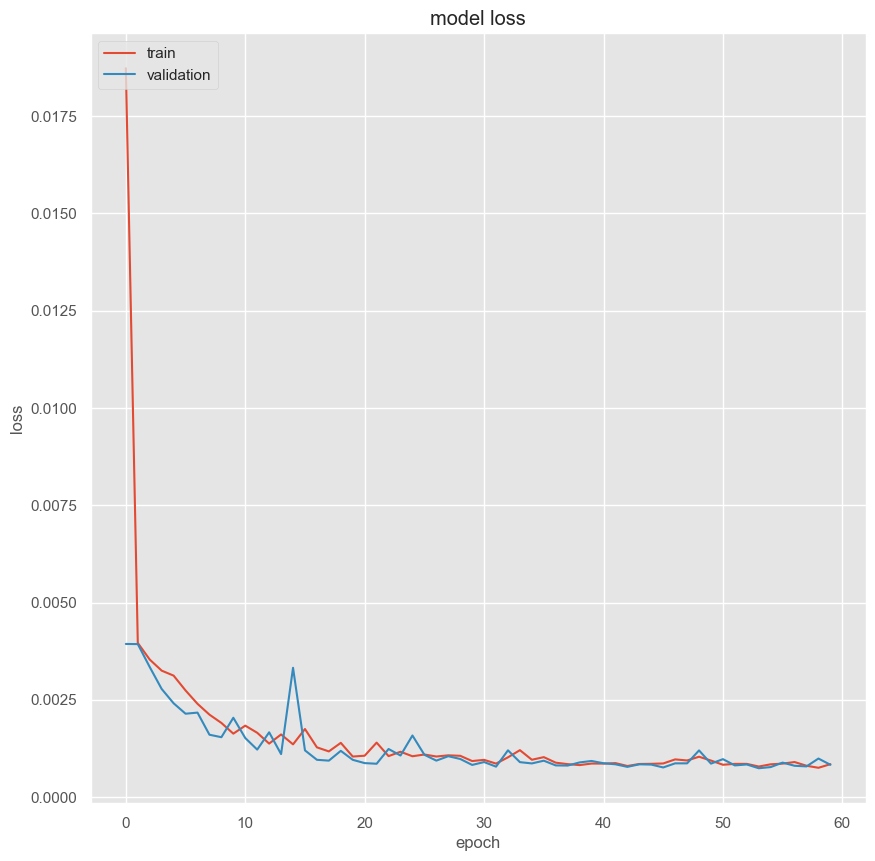

In [39]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [40]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

8/8 [==============================] - 0s 1ms/step


In [42]:
print(train_predict[0])

[0.36913517]


In [43]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02610481832903535

In [44]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE
mae = mean_absolute_error(y_train, train_predict)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, train_predict))

# Calculate MAPE
mape = np.mean(np.abs((y_train - train_predict) / y_train)) * 100

# Print the results
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.01916970751209023
RMSE: 0.02610481832903535
MAPE: 70.61389333466576%


In [45]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1297, 1)
(336, 1)
(248, 1)
[0.36913517]
(1297,)


In [46]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 [==============================] - 0s 950us/step


,Train Predictions,Actuals
0,[9154.0400390625],[9406.708333333334]
1,[9418.9580078125],[9614.791666666666]
2,[9740.923828125],[9894.708333333334]
3,[9043.609375],[8933.708333333334]
4,[8605.8984375],[8557.208333333334]
...,...,...
1292,[9090.7890625],[9259.666666666666]
1293,[10128.275390625],[10248.5]
1294,[10370.1220703125],[10360.333333333334]
1295,[10287.072265625],[10489.833333333334]


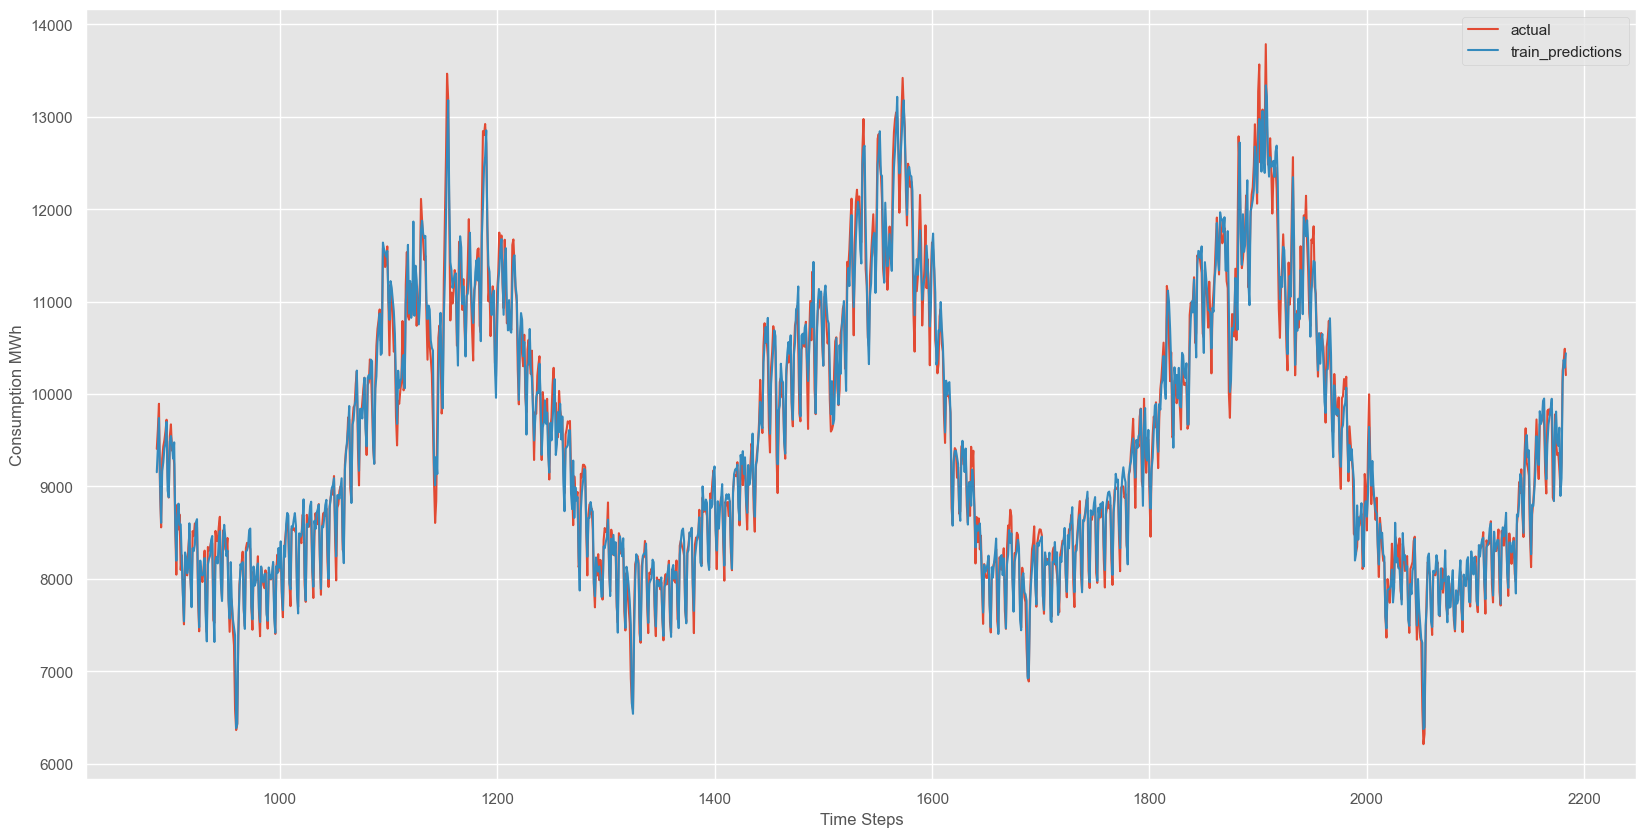

In [47]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [48]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

8/8 [==============================] - 0s 2ms/step


,Val Predictions,Actuals_val
0,[8960.8046875],[8931.875]
1,[9089.3486328125],[9112.916666666666]
2,[9224.1943359375],[10019.416666666666]
3,[10034.552734375],[10390.375]
4,[10257.0546875],[10802.916666666666]
...,...,...
243,[8274.671875],[8020.541666666667]
244,[7887.544921875],[7921.75]
245,[8613.392578125],[8705.041666666666]
246,[8855.1484375],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

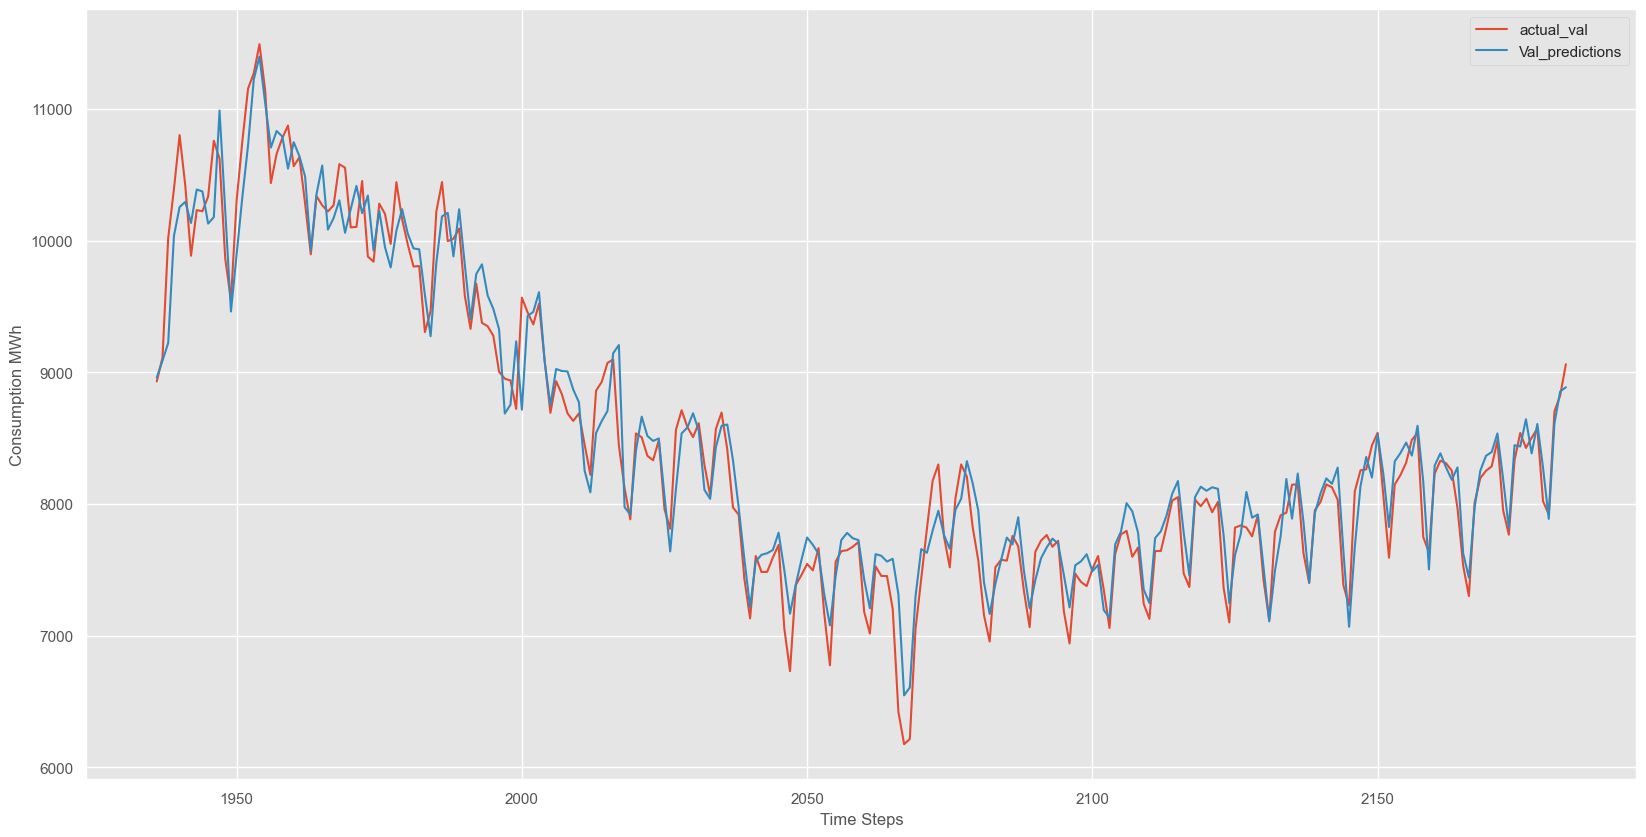

In [49]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

In [50]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 [==============================] - 0s 1ms/step


,test Predictions,Actuals_test
0,[10327.390625],[10032.541666666666]
1,[10463.7802734375],[10732.125]
2,[10761.5400390625],[10733.583333333334]
3,[10836.4482421875],[10971.875]
4,[10953.5341796875],[11227.791666666666]
...,...,...
331,[12030.525390625],[12540.25]
332,[12235.974609375],[12635.958333333334]
333,[12551.6318359375],[11684.333333333334]
334,[12088.4794921875],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

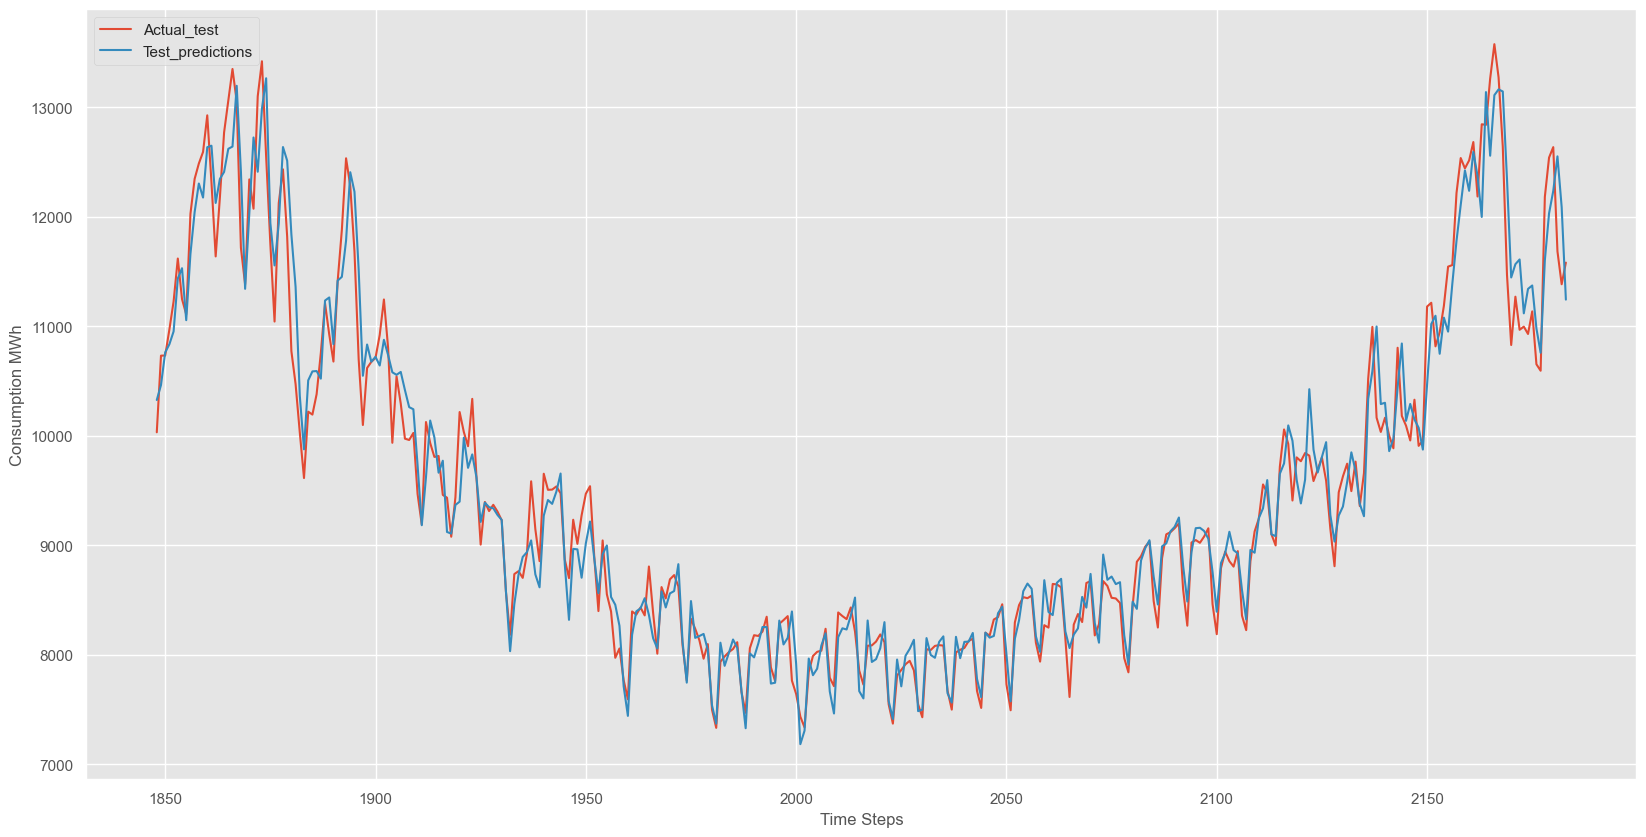

In [51]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)


# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


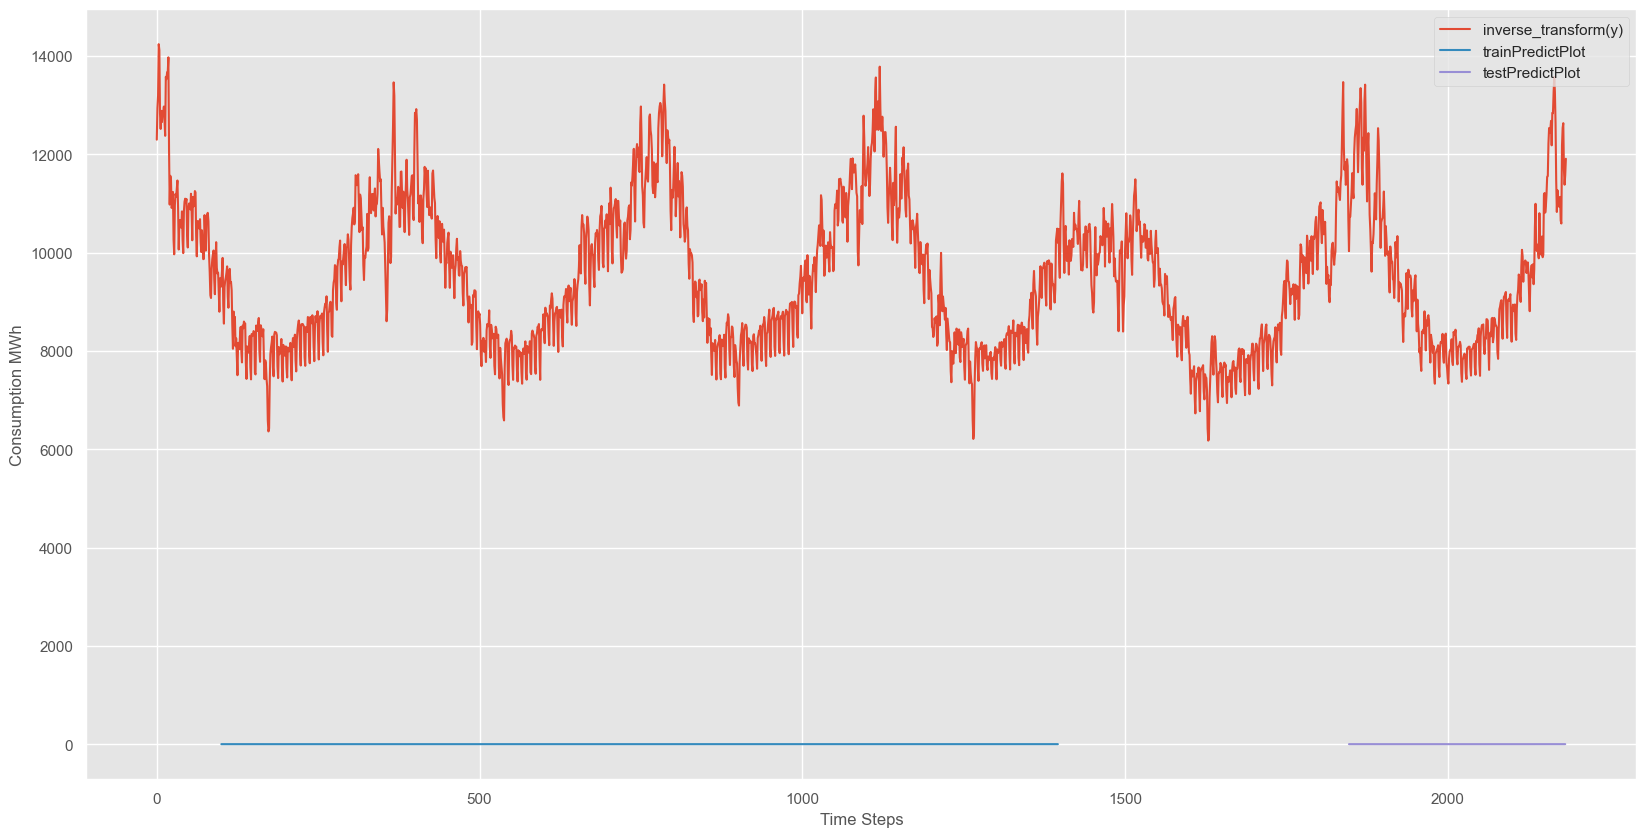

In [52]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [53]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [54]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

2184
[[12657.38589356]
 [12837.4599656 ]
 [12981.52287776]
 [12936.94278429]
 [12938.95278106]
 [12648.56258477]
 [12829.03913702]
 [13607.3070019 ]
 [13437.29974384]
 [13267.20400746]
 [13365.38177083]
 [13443.43937034]
 [13106.58939699]
 [13048.20764626]
 [13746.87338779]
 [13772.41381089]
 [13710.48090557]
 [13740.97515325]
 [13905.95212991]
 [13580.77312107]
 [13359.91631071]
 [13746.76182816]
 [13703.02516396]
 [13798.39277873]
 [13598.32164312]
 [13750.17593751]
 [13551.93976546]
 [13486.74903045]
 [14088.32327242]
 [13850.6344221 ]]


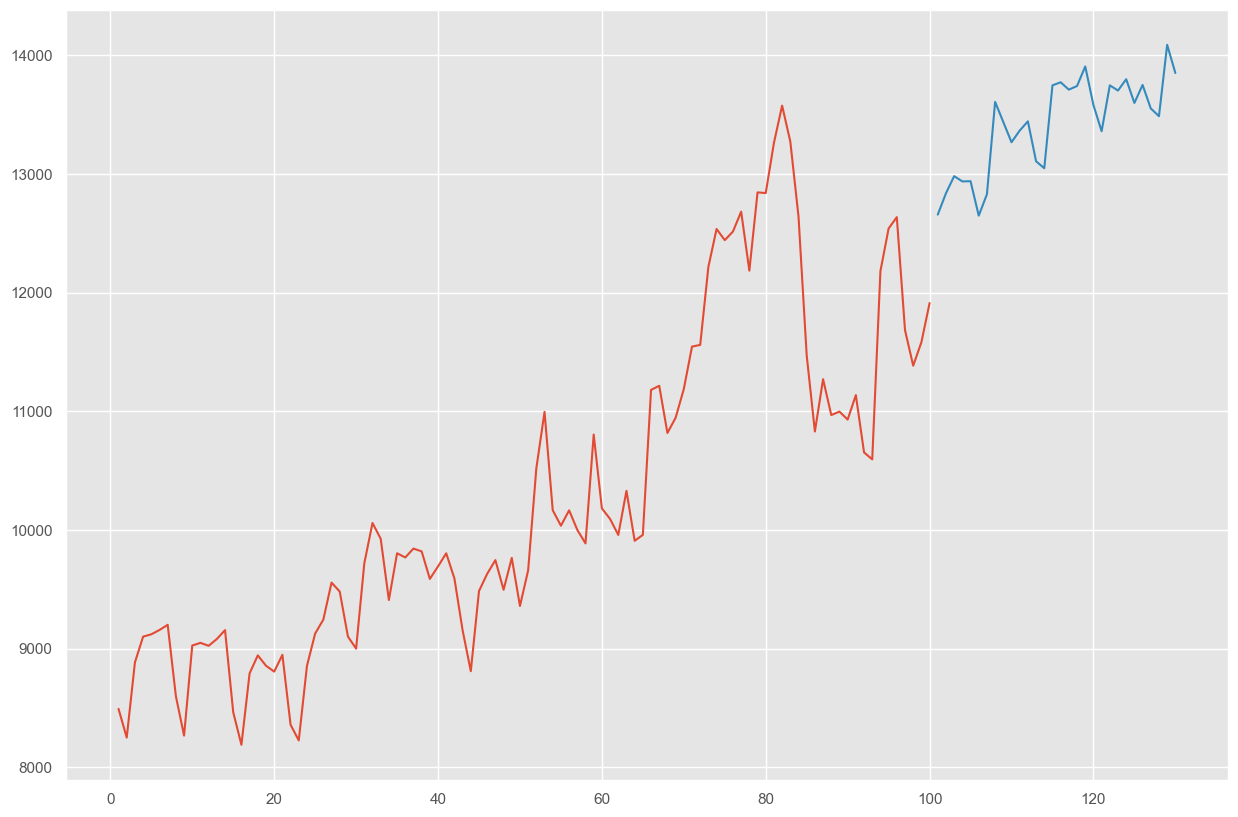

In [55]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

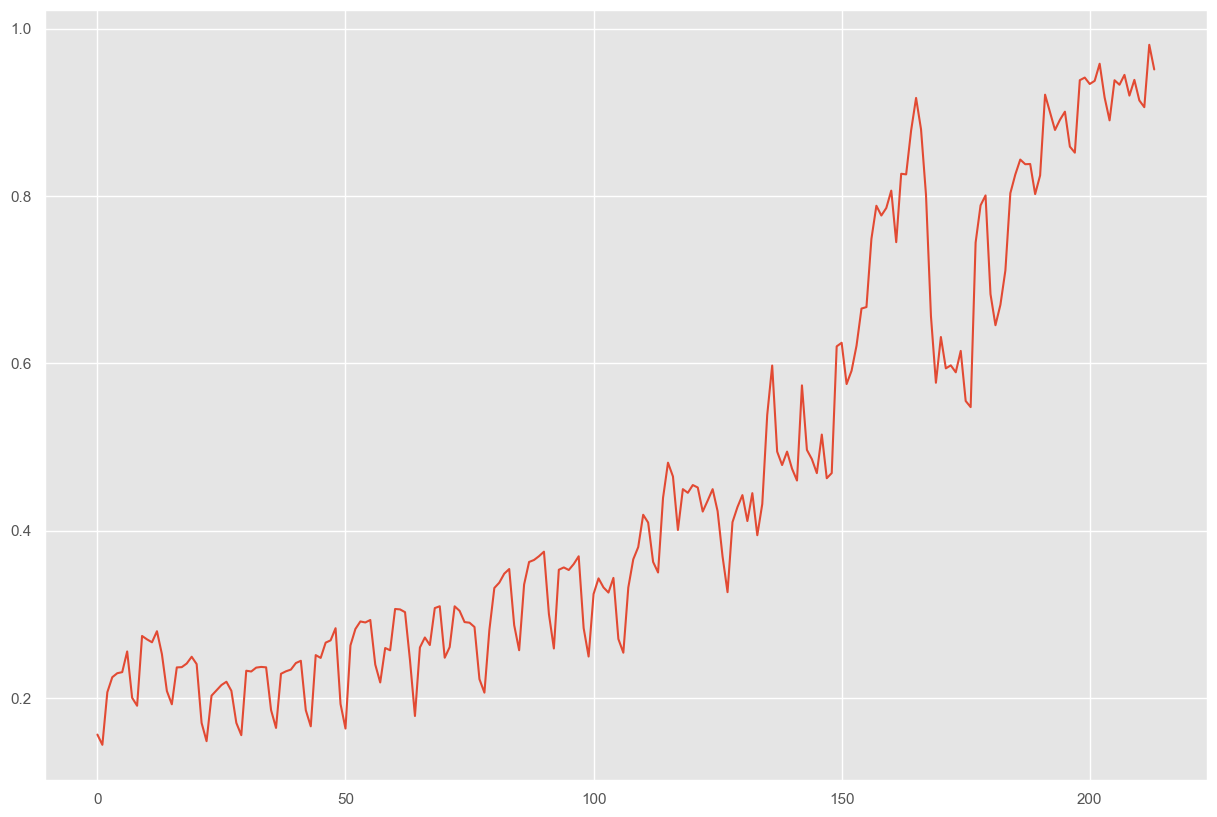

In [56]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

In [57]:
print(X_test[0])

[[0.40285095]
 [0.33421134]
 [0.30857349]
 [0.4193575 ]
 [0.45455531]
 [0.45102262]
 [0.40211239]
 [0.40051131]
 [0.37954757]
 [0.34445305]
 [0.38204214]
 [0.36811796]
 [0.38441277]
 [0.37072616]
 [0.3944014 ]
 [0.36402231]
 [0.30475674]
 [0.3934356 ]
 [0.3575612 ]
 [0.36831422]
 [0.38952071]
 [0.38295114]
 [0.30687429]
 [0.31719864]
 [0.42644871]
 [0.49505733]
 [0.48879764]
 [0.45131701]
 [0.46779775]
 [0.41787005]
 [0.38373618]
 [0.46276211]
 [0.44596116]
 [0.42849912]
 [0.42244086]
 [0.51698172]
 [0.50022725]
 [0.39616259]
 [0.44584237]
 [0.47328272]
 [0.50456564]
 [0.45412148]
 [0.51561306]
 [0.46849499]
 [0.42024068]
 [0.51445615]
 [0.50904349]
 [0.51879455]
 [0.55166822]
 [0.56423923]
 [0.48616878]
 [0.43122611]
 [0.48119512]
 [0.54250077]
 [0.59027477]
 [0.59525359]
 [0.60097097]
 [0.53182006]
 [0.49822849]
 [0.58185621]
 [0.55411631]
 [0.52053507]
 [0.52872121]
 [0.55181283]
 [0.48296147]
 [0.39535172]
 [0.43852391]
 [0.4081913 ]
 [0.41763248]
 [0.36269497]
 [0.34919946]
 [0.40

In [58]:
print(ytest[0])

[0.47802913]


In [59]:
# convert keras model to TFlite 
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
# Set the optimization flag. 
converter.optimizations = [tf.lite.Optimize.DEFAULT] 
tflite_model = converter.convert() 
 
# Save the model 
open("consumption_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpz7t1z6w4\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpz7t1z6w4\assets


204424

In [60]:
a = [
			0.4028509451502943, 0.33421134180353274, 0.3085734944737114, 0.4193575043900425, 0.45455531453362263, 0.45102262162999696, 0.40211238508418556, 0.40051131081499836, 0.379547567400062, 0.34445305237062274, 0.3820421444065695, 0.36811796302034916, 0.38441276727610785, 0.3707261646524119, 0.39440140481355235, 0.3640223117446545, 0.30475674000619757, 0.3934355954963332, 0.35756120235512856, 0.3683142237372171, 0.3895207106703854, 0.3829511414110113, 0.3068742898460902, 0.3171986365044933, 0.42644871397582895, 0.4950573287883483, 0.48879764487139765, 0.4513170127052991, 0.46779774816651176, 0.4178700547464106, 0.38373618427848377, 0.4627621113521331, 0.44596116103708316, 0.42849912199152984, 0.42244086354715427, 0.5169817167647971, 0.5002272492511105, 0.3961625865096582, 0.44584237165582075, 0.47328271872740435, 0.5045656440450367, 0.45412147505422984, 0.5156130565024274, 0.4684949901869643, 0.42024067761594897, 0.514456151224047, 0.5090434872430535, 0.5187945460179734, 0.5516682160933789, 0.5642392314843508, 0.48616878421650667, 0.431226113004855, 0.48119512447061263, 0.542500774713356, 0.5902747650036154, 0.5952535895052166, 0.6009709740729264, 0.5318200599111663, 0.4982284887924803, 0.5818562132011155, 0.554116310298523, 0.520535068691251, 0.5287212064869332, 0.5518128292531762, 0.4829614709224256, 0.39535171986365036, 0.4385239128189239, 0.40819130255138936, 0.417632475983886, 0.36269496952794145, 0.3491994628654066, 0.4058516682160934, 0.3926247288503254, 0.47833901456461103, 0.4958578659229419, 0.4991942981096994, 0.46700237578762527, 0.44355954963330235, 0.46550459663257937, 0.47699101332506977, 0.5854147298832765, 0.6538064249560996, 0.6284423096787523, 0.6397324656543747, 0.6329614709224255, 0.61848466067555, 0.6069982439830596, 0.650475157525049, 0.6692593740316083, 0.7452071067038529,
			0.8350945150294392, 0.9043280652825124, 0.7427435182315877, 0.683100919326516, 0.70252556554075, 0.6453000723065799, 0.653258960851152, 0.7098078710876975, 0.6929242846813347, 0.558811073236236, 0.47802912922218777, 0.5647453775436423, 0.5649261439933891, 0.594463381882037, 0.6261853114347692, 0.6746513789897738, 0.6287263712426402, 0.6114760871810764, 0.7251368660262371, 0.764822848879248, 0.7821764280549531, 0.7952794132837518, 0.8367162483214544, 0.7609492820989568, 0.6770426608821404, 0.7435233963433531, 0.8173070963743415, 0.8536153289949387, 0.8891591777708917, 0.8524532589608512, 0.6868815205040802, 0.6454705092449128, 0.7642030781944015, 0.7310401817994011, 0.8583204214440657, 0.8978927796715216, 0.7898047722342733, 0.6911269496952795, 0.6033519264538788, 0.737521950211755, 0.7756223530627003, 0.6991942981096994, 0.5699101332506972, 0.5325947732672246, 0.4777295733911787, 0.4262576180146679, 0.5013686602623698, 0.4980528870984403, 0.5211600041318046, 0.5676686292738354, 0.6238973246565439, 0.5886840202458424, 0.5580776779258342, 0.648972213614296, 0.7070808800743725, 0.7881004028509452, 0.7568329718004337, 0.6826309265571738, 0.5604534655510794, 0.48628240884206175, 0.5507902076231793, 0.5576799917363909, 0.5621681644458217, 0.5881882036979652, 0.6283286850531972, 0.5732672244602831, 0.4661450263402541, 0.541276727610784, 0.5105774196880487, 0.4708036359880178, 0.469311021588679, 0.47729056915607904, 0.4082481148641671, 0.37375271149674616, 0.48962917054023347, 0.4658867885549015, 0.4501549426712116, 0.451224047102572,
			0.40714802189856425, 0.40403367420721004, 0.35985435388906095, 0.40450883173225904, 0.500934820782977, 0.4783131907860759, 0.46225596529284163, 0.5158609647763662, 0.42733705195744254, 0.35091416176014867, 0.3991891333539924, 0.38890093998553865, 0.3959456667699618, 0.38831732259064144, 0.37849912199153, 0.29794442722859216, 0.24886891850015502, 0.31757566367110857, 0.3208656130565025, 0.3132734221671315, 0.34065695692593734, 0.4225544881727096, 0.36835037702716666, 0.3322074165891954, 0.4311228178907137, 0.4129428778018801, 0.4131649622972834, 0.4167647970251006, 0.40899700444168985, 0.3339221154839377, 0.3130513376717282, 0.37905175085218457, 0.35179217023034803, 0.38408738766656325, 0.4084340460696211, 0.41703336432186766, 0.337713046172916, 0.2757101539097201, 0.3556295837206901, 0.2947887614915815, 0.2752453258960853, 0.22283338498089045, 0.23339531040181793, 0.19743828116930073, 0.1759322384051234, 0.2752918086974486, 0.27164549116826764, 0.2797438281169301, 0.27081396549943204, 0.3261491581448198, 0.27358743931412055, 0.2275023241400682, 0.30286643941741553, 0.29001652721826254, 0.3116465241194092, 0.31641875839272815, 0.3036204937506456, 0.23704679268670603, 0.19703026546844327, 0.2669713872533831, 0.25571738456771, 0.2426557173845677, 0.22180043383947945, 0.23835347588059086, 0.16415143063733084, 0.14356987914471653, 0.2184071893399443, 0.22432599938022935, 0.2292273525462245, 0.2327652102055573, 0.2404916847433115, 0.18424233033777504, 0.16058258444375584, 0.2337000309885343, 0.2483989257308129, 0.24755190579485598, 0.25247391798367935, 0.2693213511000928, 0.21202355128602424, 0.19654477843198026, 0.26130048548703655, 0.26545294907550876, 0.2699927693420102, 0.19699927693420094, 0.18194401404813554, 0.15625451916124367, 0.14403987191405843, 0.20688978411321146, 0.224852804462349,
			0.22959405020142554, 0.23091106290672458, 0.25565540749922533, 0.20024274351823157, 0.19071376923871497, 0.27414523293048243, 0.2700547464104949, 0.26656853630823274, 0.279816134696829, 0.2524325999380229, 0.20836173948972214, 0.1924594566676996, 0.23654064662741459, 0.23686602623695896, 0.24119409151947113, 0.24928209895671938, 0.24051750852184706, 0.17020452432599942, 0.1483679371965706, 0.20275797954756747, 0.20904865199876055, 0.21546844334262982, 0.21941948145852697, 0.20857349447371132, 0.17026133663877696, 0.15555727714079126, 0.23257411424439622, 0.23165995248424742, 0.23629273835347575, 0.23712942877801868, 0.23665943600867678, 0.1855800020659022, 0.1642030781944014, 0.22894845573804357, 0.23189236649106493, 0.23396859828530103, 0.24175704989154012, 0.24445821712632998, 0.18539923561615534, 0.16611920256171875, 0.2512550356368143, 0.24789794442722857, 0.26615535585166816, 0.26888751162070024, 0.2834159694246462, 0.19285197810143584, 0.16346968288399955, 0.26281892366491066, 0.2825069724202044, 0.2914781530833591, 0.29026960024790827, 0.29322384051234385, 0.23993905588265674, 0.2185466377440347, 0.2597355645077989, 0.2570034087387666, 0.3063939675653341, 0.30588265675033577, 0.3025720483421134, 0.24512447061254006, 0.17848879248011573, 0.26037082945976675, 0.27232207416589194, 0.2632940811899597, 0.3074527424852803, 0.30966325792790006, 0.24813035843404607, 0.26085631649622976, 0.3095909513480012, 0.30412663980993704, 0.2907344282615433, 0.2899907034397272, 0.28484144199979344, 0.22250284061563885, 0.20638880280962713, 0.2813500671418242, 0.33147402127879355, 0.33787315359983483, 0.3486106807148023

	]
print(len(a))

336


In [78]:
import serial
import time

# The 100 floats you want to send to the STM32:
# Flatten the 2D array to 1D
x = X_test[0].flatten()

# Convert to a regular Python list
list_x = array_1d.tolist()

print(x)

# The COM port on Windows might be COM3, COM4, etc.
# On Linux, something like "/dev/ttyUSB0"
port_name = "COM9"  
baudrate = 115200

with serial.Serial(port_name, baudrate, timeout=3) as ser:
    # Small pause so STM32 can reset/initialize
    time.sleep(2)
    
    print("Sending 100 floats to STM32 ...")
    # Send each float as ASCII text plus newline
    for val in list_x:
        line_str = f"{val:.8f}\n"
        ser.write(line_str.encode('ascii'))
        time.sleep(0.01)  # small delay (optional)
    
    print("All floats sent. Waiting for the model's output ...")
    
    # Read the line that the board sends back
    # e.g. "0.123456\n"
    predicted_line = ser.readline().decode('ascii').strip()
    print("Received from STM32:", predicted_line)
    print("Actual:", ytest[1])


[0.40285095 0.33421134 0.30857349 0.4193575  0.45455531 0.45102262
 0.40211239 0.40051131 0.37954757 0.34445305 0.38204214 0.36811796
 0.38441277 0.37072616 0.3944014  0.36402231 0.30475674 0.3934356
 0.3575612  0.36831422 0.38952071 0.38295114 0.30687429 0.31719864
 0.42644871 0.49505733 0.48879764 0.45131701 0.46779775 0.41787005
 0.38373618 0.46276211 0.44596116 0.42849912 0.42244086 0.51698172
 0.50022725 0.39616259 0.44584237 0.47328272 0.50456564 0.45412148
 0.51561306 0.46849499 0.42024068 0.51445615 0.50904349 0.51879455
 0.55166822 0.56423923 0.48616878 0.43122611 0.48119512 0.54250077
 0.59027477 0.59525359 0.60097097 0.53182006 0.49822849 0.58185621
 0.55411631 0.52053507 0.52872121 0.55181283 0.48296147 0.39535172
 0.43852391 0.4081913  0.41763248 0.36269497 0.34919946 0.40585167
 0.39262473 0.47833901 0.49585787 0.4991943  0.46700238 0.44355955
 0.4655046  0.47699101 0.58541473 0.65380642 0.62844231 0.63973247
 0.63296147 0.61848466 0.60699824 0.65047516 0.66925937 0.74520